In [1]:
import os

os.chdir("../..")

import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_auc_score

In [2]:
results = pd.read_csv("output/results_ptbxl.csv", index_col="Method")
results = results['exp4_AUC'].to_frame()
results = results[results['exp4_AUC']!='---']

In [3]:
results['AUC'] = results['exp4_AUC'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
results['CI'] = results['exp4_AUC'].str.extract(r'\((\d+)\)', expand=False).astype(float)
results['CI'] = results['CI']/1000

results.sort_index(inplace=True)
results.index = results.index.str.replace(r'models\\', '')
results = results.sort_values("AUC")

C:\Users\agarw\AppData\Local\Temp\ipykernel_35864\3660842115.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  results.index = results.index.str.replace(r'models\\', '')


In [4]:
methods = results.index.to_list()
methods.remove("naive")

In [5]:
methods = ['AttNet+Baseline+lead1', 'ResNet+Baseline+lead1', 
          'VGGNet+lead1', 'AlexNet+lead1', 'LeNet+lead1']

In [6]:
raw_test_preds = []
raw_val_preds = []

for method in methods:
    test = np.load(f"output/exp4/models/{method}/y_test_pred.npy", allow_pickle=True)
    val = np.load(f"output/exp4/models/{method}/y_val_pred.npy", allow_pickle=True)
    raw_test_preds += [test]
    raw_val_preds += [val]

In [7]:
with open(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\mlb.pkl", 'rb') as f:
    mlb = pickle.load(f).classes_
y_test =np.load(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\y_test.npy", allow_pickle=True)
y_val =np.load(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\y_val.npy", allow_pickle=True)

In [8]:
val_aucs = pd.DataFrame(columns=methods, index=mlb)

for index in range(43):
    true = y_val[:,index]
    for method in range(len(methods)):
        pred = raw_val_preds[method][:,index]
        val_aucs[methods[method]][mlb[index]] = roc_auc_score(true, pred)

val_aucs

,AttNet+Baseline+lead1,ResNet+Baseline+lead1,VGGNet+lead1,AlexNet+lead1,LeNet+lead1
2AVB,0.943768,0.942362,0.945173,0.947985,0.761949
3AVB,0.974684,0.996718,0.907642,0.911158,0.966479
ABQRS,0.619343,0.619621,0.585254,0.611522,0.62649
AFIB,0.985981,0.981504,0.965162,0.975599,0.924495
AFLT,0.970193,0.998724,0.991139,0.985164,0.947033
ALMI,0.944395,0.932459,0.824623,0.890264,0.894505
AMI,0.64139,0.652745,0.645387,0.630181,0.68878
ASMI,0.849539,0.866553,0.823071,0.849554,0.849892
CLBBB,0.977486,0.986349,0.972556,0.99038,0.988903
CRBBB,0.994187,0.991337,0.963448,0.988488,0.982998


## SVM Mean ensembler

In [10]:
# Introduce DataFrame for ensembler

ensemble_results = pd.DataFrame(index=['AUC Test', 'CI'])

In [11]:
mean_ensemble_vals = pd.DataFrame(columns=mlb)

In [12]:
mean_raw_test = np.array(raw_test_preds).mean(axis=0)

In [13]:
ensemble_results['Mean'] = [roc_auc_score(y_test, mean_raw_test), "---"]

In [14]:
ensemble_results

,Mean
AUC Test,0.862223
CI,---


## Voting Mean

In [14]:
def get_middle_80_columns(row):
    """
    Function to get the indices of the columns with the middle 80% values for a given row.
    """
    # Sort the values in ascending order
    sorted_values = row.sort_values().values
    
    # Calculate the indices for the middle 80%
    lower_idx = int(len(sorted_values) * 0.1)
    upper_idx = int(len(sorted_values) * 0.9)
    
    # Get the middle 80% values
    middle_80_values = sorted_values[lower_idx:upper_idx]
    
    # Get the indices of the columns with the middle 80% values
    middle_80_columns = row[row.isin(middle_80_values)].index.tolist()
    
    return [row.index.get_loc(col) for col in middle_80_columns]

val_aucs[r'Middle 80% Methods'] = val_aucs.apply(get_middle_80_columns, axis=1)

In [15]:
voting_preds = []

for i in range(len(mlb)):
    v = []
    selections = val_aucs[r'Middle 80% Methods'][mlb[i]]
    for j in range(len(methods)):
        if j in selections:
            v += [raw_test_preds[j][:,i]]
    voting_preds += [np.array(v).mean(axis=0)]

voting_preds = np.array(voting_preds).T

ensemble_results['Voting'] = [roc_auc_score(y_test, voting_preds), "---"]

## Trimmed SMV

In [18]:
from sklearn.metrics import *

In [19]:
a = np.array(raw_test_preds)
a.sort(axis=0)
roc_auc_score(y_test, a[1:-1,:].mean(axis=0))

In [25]:
a.sort(axis=0)

In [27]:
roc_auc_score(y_test, a[1:-1,:].mean(axis=0)), f1_score(y_test[:,8], (a[1:-1,:,8].mean(axis=0)>0.5).astype(int))

(0.8616869957811726, 0.8041237113402061)

In [84]:
a = np.sort(a, axis=0)

roc_auc_score(y_test, a[1:-1,:,:].mean(axis=0))

0.8616869957811726

In [18]:
ensemble_results['Trim SMV'] = [roc_auc_score(y_test, a[1:-1,:,:].mean(axis=0)), "---"]

ensemble_results

,Mean,Voting,Trim SMV
AUC Test,0.862223,0.854955,0.861687
CI,---,---,---


In [19]:
roc_auc_score(y_test, a[1:-1,:,:].mean(axis=0))

0.8616869957811726

In [28]:
roc_auc_score(y_test[:,8], a[1:-1,:,8].mean(axis=0))

0.9975856945770986

In [44]:
raw_test_preds

[array([[1.34762289e-04, 5.41464069e-05, 7.76977018e-02, ...,
         2.86966497e-06, 1.54039252e-03, 3.92198446e-04],
        [5.65799382e-05, 2.67043160e-05, 8.03687647e-02, ...,
         1.27472993e-06, 1.31970574e-03, 4.57699061e-04],
        [7.79107650e-05, 1.51027823e-04, 3.40114146e-01, ...,
         3.44123873e-05, 1.60098798e-03, 1.13267545e-02],
        ...,
        [6.09051494e-05, 2.30187561e-05, 1.04368858e-01, ...,
         6.44572901e-06, 1.75869907e-03, 1.09690451e-03],
        [3.69883637e-05, 2.18367277e-05, 3.19353074e-01, ...,
         1.52657003e-06, 5.57789463e-04, 1.69560302e-03],
        [1.24889659e-04, 6.43841631e-05, 1.82759523e-01, ...,
         1.19893637e-04, 1.55549671e-03, 4.21226228e-04]], dtype=float32),
 array([[4.97635374e-05, 8.67456322e-07, 7.52055869e-02, ...,
         2.55614214e-05, 5.94671292e-04, 5.03657066e-05],
        [1.85971658e-05, 8.69795713e-07, 7.69104138e-02, ...,
         1.19501256e-05, 6.07117545e-04, 6.05522364e-05],
        [4

## Weighted SMV

In [29]:
weights = pd.DataFrame(index=mlb, columns=methods)

for i in range(len(mlb)):
    aucs = [roc_auc_score(y_val[:,i], raw_val_preds[method][:,i]) for method in range(len(methods))]
    aucs = np.array(aucs)
    aucs /= aucs.sum()
    weights.loc[mlb[i]] = aucs

weights = weights.to_numpy().astype(float)

In [30]:
transposed_preds = np.transpose(np.array(raw_test_preds), (1, 2, 0))

# Perform the weighted sum using np.einsum
# "ijk,kj->ij" means:
# ijk -> 2148 samples, 43 classes, 5 models (transposed_preds)
# kj -> 43 classes, 5 models (weights)
# ij -> 2148 samples, 43 classes (final output)
result = np.einsum('ijk,kj->ij', transposed_preds, weights.T)

In [31]:
from sklearn.metrics import *

In [35]:
roc_auc_score(y_test, result), f1_score(y_test[:,8], (result[:,8]>0.5).astype(int))

(0.8625616366191902, 0.8041237113402061)

In [33]:
recall_score(y_test[:,8], (result[:,8]>0.5).astype(int))

0.7222222222222222

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
models = []
linear_preds = []

for i in range(43):
    a =np.array(raw_val_preds)[:,:,i].T
    model = LinearRegression().fit(a, y_val[:,i])
    models += [model]
    
    linear_preds += [model.predict(np.array(raw_test_preds)[:,:,i].T)]

linear_preds = np.array(linear_preds).T

In [22]:
ensemble_results['Linear Reg'] = [roc_auc_score(y_test, linear_preds), "---"]

ensemble_results

,Mean,Voting,Trim SMV,Linear Reg
AUC Test,0.862223,0.854955,0.861687,0.791441
CI,---,---,---,---


## Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso_models = []
lasso_preds = []

for i in range(43):
    a =np.array(raw_val_preds)[:,:,i].T
    model = Lasso(alpha=1e-5).fit(a, y_val[:,i])
    lasso_models += [model]
    
    lasso_preds += [model.predict(np.array(raw_test_preds)[:,:,i].T)]

lasso_preds = np.array(lasso_preds).T

In [25]:
ensemble_results['Lasso'] = [roc_auc_score(y_test, lasso_preds), "---"]

ensemble_results

,Mean,Voting,Trim SMV,Linear Reg,Lasso
AUC Test,0.862223,0.854955,0.861687,0.791441,0.789766
CI,---,---,---,---,---


Need to write something about how having the alpha results in changes and why linear regression is therefore more robust

## Ridge Regression

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge_models = []
ridge_preds = []

for i in range(43):
    a =np.array(raw_val_preds)[:,:,i].T
    model = Ridge().fit(a, y_val[:,i])
    ridge_models += [model]
    
    ridge_preds += [model.predict(np.array(raw_test_preds)[:,:,i].T)]

ridge_preds = np.array(ridge_preds).T

In [38]:
ensemble_results['Ridge'] = [roc_auc_score(y_test, ridge_preds), "---"]

ensemble_results

,Mean,Ridge
AUC Test,0.862223,0.855927
CI,---,---


## Elastic Net

In [29]:
from sklearn.linear_model import ElasticNet

In [30]:
en_models = []
en_preds = []

for i in range(43):
    a =np.array(raw_val_preds)[:,:,i].T
    model = ElasticNet(alpha=0.0005, l1_ratio=0.00005).fit(a, y_val[:,i])
    en_models += [model]
    
    en_preds += [model.predict(np.array(raw_test_preds)[:,:,i].T)]

en_preds = np.array(en_preds)

In [31]:
roc_auc_score(y_test, en_preds.T)

0.8560853176926999

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression, Perceptron, BayesianRidge

In [33]:
logistic_models = []
logistic_preds = []

for i in range(43):
    a =np.array(raw_val_preds)[:,:,i].T
    model = BayesianRidge().fit(a, y_val[:,i])
    logistic_models += [model]
    
    logistic_preds += [model.predict(np.array(raw_test_preds)[:,:,i].T)]

logistic_preds = np.array(logistic_preds).T

In [34]:
ensemble_results['Bayesian Ridge'] = [roc_auc_score(y_test, logistic_preds), "---"]

ensemble_results

,Mean,Voting,Trim SMV,Linear Reg,Lasso,Ridge,Bayesian Ridge
AUC Test,0.862223,0.854955,0.861687,0.791441,0.789766,0.855927,0.801588
CI,---,---,---,---,---,---,---


## Basic NN

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [36]:
raw_val_preds

[array([[6.0179151e-05, 2.4283143e-05, 9.1353767e-02, ..., 2.3074786e-06,
         1.4730772e-03, 7.0924649e-04],
        [9.8845638e-05, 4.7098176e-05, 7.1037225e-02, ..., 1.9506342e-06,
         1.6217484e-03, 4.8385854e-04],
        [5.8813919e-03, 3.3104658e-04, 1.9658443e-01, ..., 4.2521615e-02,
         1.5925575e-03, 2.1239974e-04],
        ...,
        [7.5658623e-05, 7.0432303e-05, 2.9876527e-01, ..., 8.2741084e-05,
         1.4772760e-03, 1.7481470e-03],
        [5.6307585e-05, 1.5889229e-05, 3.2927729e-02, ..., 1.0772507e-06,
         1.9791883e-03, 1.6263618e-04],
        [1.9376166e-04, 7.0649447e-05, 9.1415964e-02, ..., 1.3518085e-05,
         2.1183689e-03, 7.8869757e-04]], dtype=float32),
 array([[8.7204771e-06, 6.0962561e-06, 1.0931303e-01, ..., 7.6190488e-05,
         4.4771921e-04, 1.4203624e-03],
        [3.3224776e-05, 1.6001170e-06, 8.2197107e-02, ..., 4.1880339e-05,
         9.4639428e-04, 1.8696608e-04],
        [1.5226708e-03, 8.2305130e-05, 3.4702948e-01, ...,

In [37]:
nn_models = []
nn_preds = []

for i in range(43):
    a =np.array(raw_val_preds)[:,:,i].T
    model = Sequential()
    # model.add(Dense(a.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu', input_shape=(a.shape[1],)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy')
    model.fit(a, np.array([y_val[:,i]]).T)
    nn_models += [model]
    
    nn_preds += [model.predict(np.array(raw_test_preds)[:,:,i].T)]

nn_preds = np.array(nn_preds).T

68/68 [==============================] - 0s 723us/step


In [38]:
ensemble_results['NN'] = [roc_auc_score(y_test, nn_preds[0]), "---"]

ensemble_results

,Mean,Voting,Trim SMV,Linear Reg,Lasso,Ridge,Bayesian Ridge,NN
AUC Test,0.862223,0.854955,0.861687,0.791441,0.789766,0.855927,0.801588,0.363726
CI,---,---,---,---,---,---,---,---


In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_test, (linear_preds > 0.5).astype(int), average="macro")

0.15988172310884416

In [41]:
roc_auc_score(y_test, (linear_preds > 0.5).astype(int))

0.5643940531702584

## Decision Trees

In [37]:
from sklearn.ensemble import RandomForestClassifier

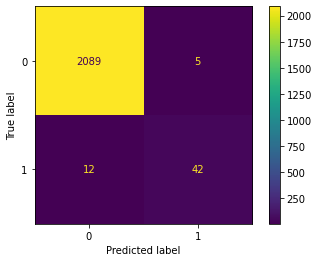

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test[:,8],(linear_preds[:,8]>0.5).astype(int))
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [39]:
rf_models = []
rf_preds = []

for i in range(43):
    a =np.array(raw_val_preds)[:,:,i].T
    model = RandomForestClassifier(criterion="gini").fit(a, y_val[:,i])
    rf_models += [model]
    
    rf_preds += [model.predict(np.array(raw_test_preds)[:,:,i].T)]

rf_preds = np.array(rf_preds).T

In [40]:
roc_auc_score(y_test, rf_preds)

0.5662544685817484

In [40]:
import multiprocessing
from itertools import repeat

In [88]:
def part_dus(true, preds):
    nums = true.shape[1]
    duses = []
    for i in range(nums):
        predsx = preds[:,i]
        y_testx = true[:,i]
        
        tn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][0]
        tp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][1]
        fp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][1]
        fn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][0]
        
        dus = 0.5*(0.5 + 0.5*(tn/(tn+fn)))
        duses += [dus]
    return np.array(duses).mean()

In [173]:
test_samples = np.array(utils.get_appropriate_bootstrap(y_test, 100))
y_test_pred = np.array(raw_test_preds).mean(axis=0)
pool = multiprocessing.Pool(5)
            
thresholds = None

te_df = pd.concat(pool.starmap(utils.generate_results, zip(test_samples, repeat(y_test), repeat(y_test_pred), repeat(thresholds))))
te_df_point = utils.generate_results(range(len(y_test)), y_test, y_test_pred, thresholds)
te_df_result = pd.DataFrame(
    np.array([te_df_point.mean().values,
                te_df.mean().values,
                te_df.quantile(0.05).values,
                te_df.quantile(0.95).values]), 
    columns=te_df.columns, 
    index=['point', 'mean', 'lower', 'upper'])
pool.close()

te_df_result

,macro_auc
point,0.862223
mean,0.862972
lower,0.851320
upper,0.874446


In [175]:
dus_df = 0.5*te_df + part_dus(y_test, y_test_pred)

dus_df

,macro_auc
0,0.924297
0,0.931428
0,0.923637
0,0.927131
0,0.928116
...,...
0,0.922813
0,0.920135
0,0.928248
0,0.923441


In [176]:
pool = multiprocessing.Pool(5)
y_test_pred = result
thresholds = None

te_df1 = pd.concat(pool.starmap(utils.generate_results, zip(test_samples, repeat(y_test), repeat(y_test_pred), repeat(thresholds))))
te_df_point = utils.generate_results(range(len(y_test)), y_test, y_test_pred, thresholds)
te_df_result1 = pd.DataFrame(
    np.array([te_df_point.mean().values,
                te_df1.mean().values,
                te_df1.quantile(0.05).values,
                te_df1.quantile(0.95).values]), 
    columns=te_df1.columns, 
    index=['point', 'mean', 'lower', 'upper'])
pool.close()

te_df_result1

,macro_auc
point,0.862562
mean,0.863366
lower,0.851909
upper,0.874956


In [177]:
dus_df1 = 0.5*te_df1 + part_dus(y_test, y_test_pred)

dus_df1

,macro_auc
0,0.924693
0,0.931620
0,0.923992
0,0.927297
0,0.928413
...,...
0,0.923333
0,0.920288
0,0.928472
0,0.923649


In [178]:
a = np.array(raw_test_preds)
a.sort(axis=0)
# roc_auc_score(y_test, a[1:-1,:].mean(axis=0))

y_test_pred = a[1:-1,].mean(axis=0)


In [179]:
pool = multiprocessing.Pool(5)
thresholds = None

te_df3 = pd.concat(pool.starmap(utils.generate_results, zip(test_samples, repeat(y_test), repeat(y_test_pred), repeat(thresholds))))
te_df_point = utils.generate_results(range(len(y_test)), y_test, y_test_pred, thresholds)
te_df_result3 = pd.DataFrame(
    np.array([te_df_point.mean().values,
                te_df3.mean().values,
                te_df3.quantile(0.05).values,
                te_df3.quantile(0.95).values]), 
    columns=te_df.columns, 
    index=['point', 'mean', 'lower', 'upper'])
pool.close()

te_df_result3

,macro_auc
point,0.861687
mean,0.861888
lower,0.850528
upper,0.873241


In [180]:
dus_df3 = 0.5*te_df3 + part_dus(y_test, y_test_pred)

dus_df3

,macro_auc
0,0.922815
0,0.930382
0,0.923817
0,0.926587
0,0.927264
...,...
0,0.921321
0,0.919442
0,0.928077
0,0.924562


In [181]:
pool = multiprocessing.Pool(5)
y_test_pred = ridge_preds
thresholds = None

te_df2 = pd.concat(pool.starmap(utils.generate_results, zip(test_samples, repeat(y_test), repeat(y_test_pred), repeat(thresholds))))
te_df_point = utils.generate_results(range(len(y_test)), y_test, y_test_pred, thresholds)
te_df_result2 = pd.DataFrame(
    np.array([te_df_point.mean().values,
                te_df2.mean().values,
                te_df2.quantile(0.05).values,
                te_df2.quantile(0.95).values]), 
    columns=te_df.columns, 
    index=['point', 'mean', 'lower', 'upper'])
pool.close()

te_df_result2

,macro_auc
point,0.855927
mean,0.856393
lower,0.843955
upper,0.868905


In [183]:
combined_df = pd.concat([te_df, te_df1, te_df3, te_df2], axis=1)
combined_df.columns = ['SMV', 'Weighted SMV', 'Trimmed SMV', 'Ridge']

In [198]:
combined_df.quantile(0.95)-combined_df.quantile(0.05)

SMV             0.023127
Weighted SMV    0.023047
Trimmed SMV     0.022713
Ridge           0.024950
dtype: float64

In [199]:
combined_df.quantile(0.5)

SMV             0.862653
Weighted SMV    0.863187
Trimmed SMV     0.861527
Ridge           0.857074
Name: 0.5, dtype: float64

In [182]:
dus_df2 = 0.5*te_df2 + part_dus(y_test, y_test_pred)

dus_df2

,macro_auc
0,0.924097
0,0.920822
0,0.921630
0,0.921816
0,0.927601
...,...
0,0.926864
0,0.915757
0,0.921739
0,0.919094


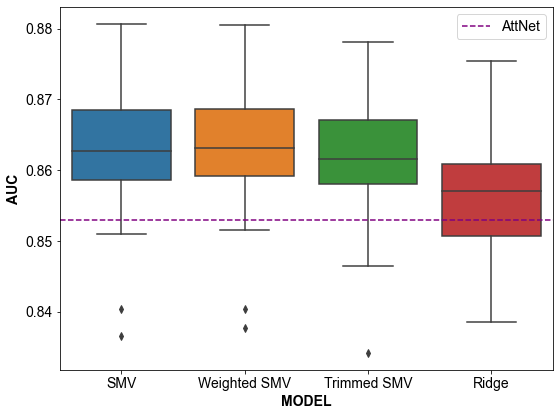

In [184]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size
plt.figure(figsize=(8, 6))
sns.boxplot(combined_df)
plt.axhline(y=0.853, linestyle='--', label = 'AttNet', c='purple')
plt.legend()
plt.xlabel("MODEL", fontweight='bold')
plt.ylabel("AUC", fontweight='bold')
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\auc_ensemble.png", dpi=1000, bbox_inches='tight')

In [197]:
combined_dus.quantile(0.5)

SMV             0.924800
Weighted SMV    0.925070
Trimmed SMV     0.924254
Ridge           0.922303
Name: 0.5, dtype: float64

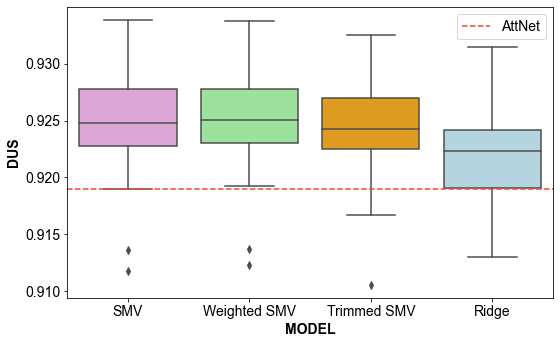

In [189]:
combined_dus = pd.concat([dus_df, dus_df1, dus_df3, dus_df2], axis=1)
combined_dus.columns = ['SMV', 'Weighted SMV', 'Trimmed SMV', 'Ridge']

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size
plt.figure(figsize=(8, 5))
colours = ['#E59EDD', '#90EE90', '#FFA500', '#ADD8E6']
sns.boxplot(combined_dus, palette=colours)
plt.axhline(y=0.919, linestyle='--', label = 'AttNet', c='#F4442E')
plt.legend()
plt.xlabel("MODEL", fontweight='bold')
plt.ylabel("DUS", fontweight='bold')
plt.tight_layout()
plt.savefig(r"C:\Users\agarw\OneDrive - Imperial College London\Year 4\Final Year Project\Report Images\dus_ensemble.png", dpi=1000, bbox_inches='tight')

In [207]:
combined_dus.mean(axis=0)

SMV             0.924960
Weighted SMV    0.925159
Trimmed SMV     0.924435
Ridge           0.921963
dtype: float64

In [113]:
for i in range(len(methods)):
    print(f"Model {methods[i]}:")
    print(.5*roc_auc_score(y_test, raw_test_preds[i]) + part_dus(y_test, raw_test_preds[1]))

Model AttNet+Baseline+lead1:
0.9191315904650788
Model ResNet+Baseline+lead1:
0.914870672669448
Model VGGNet+lead1:
0.9018527573829312
Model AlexNet+lead1:
0.9120243225238234
Model LeNet+lead1:
0.9049561814792597


In [115]:
def dus_score(true, preds, beta=0.5):
    nums = true.shape[1]
    duses = []
    for i in range(nums):
        predsx = preds[:,i]
        y_testx = true[:,i]
        
        tn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][0]
        tp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][1]
        fp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][1]
        fn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][0]

        # dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*((tp+tn+fp)/(tp+tn+fp+fn))
        dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*(0.5 + 0.5*(tn/(tn+fn)))
        duses += [dus]
    return np.array(duses).mean()

In [168]:
for i in range(len(methods)):
    print(f"Model {methods[i]}:")
    print(dus_score(y_test, raw_test_preds[i], beta=0.5))

Model AttNet+Baseline+lead1:
0.920551596739508
Model ResNet+Baseline+lead1:
0.9148706726694479
Model VGGNet+lead1:
0.9022481680718546
Model AlexNet+lead1:
0.9128677753731915
Model LeNet+lead1:
0.904547493511963


In [155]:
def dus_score1(true, preds, beta=0.5):
    # nums = true.shape[1]
    duses = []
    # for i in range(nums):
    predsx = preds
    y_testx = true
        
    tn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][0]
    tp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][1]
    fp = confusion_matrix(y_testx, (predsx>0.5).astype(int))[0][1]
    fn = confusion_matrix(y_testx, (predsx>0.5).astype(int))[1][0]

        # dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*((tp+tn+fp)/(tp+tn+fp+fn))
    dus = (1-beta)*roc_auc_score(y_testx, predsx) + beta*(0.5 + 0.5*(tn/(tn+fn)))
    duses += [dus]
    return np.array(duses).mean()

In [162]:
res = np.array(raw_test_preds).mean(axis=0)
aucs = []
for i in range(43):
    aucs += [roc_auc_score(y_test[:,i], res[:,i])]
    
aucs

[0.9529576152771309,
 0.9967381174277725,
 0.6594599742844897,
 0.9766012287733361,
 0.9432841796223395,
 0.9384287635112718,
 0.7081198025826516,
 0.8573957970509694,
 0.9976741306731756,
 0.9949679861332201,
 0.829619240558932,
 0.7879761904761905,
 0.6899210914586432,
 0.8702972285446513,
 0.8797784999572393,
 0.8231593662628145,
 0.9881174277726003,
 0.793569431500466,
 0.7083527764815679,
 0.8843822843822844,
 0.914810933542922,
 0.9427472014925373,
 0.7761890302812819,
 0.8277777777777777,
 0.7121568459762251,
 0.880453972257251,
 0.9193224009900989,
 0.8483317669172933,
 0.8580848257965712,
 0.8294942595552972,
 0.8932222178406966,
 0.8493669536643945,
 0.8509131878557875,
 0.9652842497670083,
 0.9976700838769804,
 0.9816410495264709,
 0.9461297384836852,
 0.8608376308798249,
 0.8273010007400349,
 0.6991452991452992,
 0.9897435897435897,
 0.5928515928515928,
 0.8313084112149532]

(0.0, 100.0)

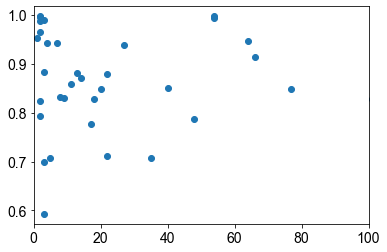

In [163]:
y_train = np.load("output/exp4/data/y_train.npy", allow_pickle=True)

count = np.sum(y_test==1, axis=0)
plt.scatter(count, aucs)
plt.xlim(0,100)

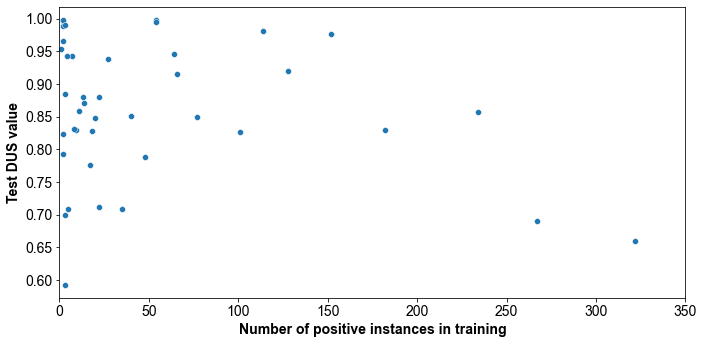

In [167]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14  # Increase font size

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=count, y=aucs)
ax.set_xlim(0,350)
ax.set_xlabel("Number of positive instances in training", fontweight="bold")
ax.set_ylabel("Test DUS value", fontweight="bold")
plt.tight_layout()

In [159]:
count

array([   1,    2,  322,  152,    7,   27,   35,  234,   54,   54,    9,
         48,  267,   14,   22,    2,    2,    2,    5,    3,   66,    4,
         17,   18,   22,   13,  128,   20,   11,  182,  963,   77,   40,
          2,    2,  114,   64, 1674,  101,    3,    3,    3,    8])

In [192]:
for i in range(len(methods)):
    pool = multiprocessing.Pool(5)
    y_test_pred = raw_test_preds[i]
    thresholds = None

    te_df20 = pd.concat(pool.starmap(utils.generate_results, zip(test_samples, repeat(y_test), repeat(y_test_pred), repeat(thresholds))))
    te_df_point = utils.generate_results(range(len(y_test)), y_test, y_test_pred, thresholds)
    te_df_result20 = pd.DataFrame(
        np.array([te_df_point.mean().values,
                    te_df20.mean().values,
                    te_df20.quantile(0.05).values,
                    te_df20.quantile(0.95).values]), 
        columns=te_df.columns, 
        index=['point', 'mean', 'lower', 'upper'])
    pool.close()

    print(f"Model {methods[i]}")
    print((te_df_result20.quantile(0.95) - te_df_result20.quantile(0.05))/2)
    dus_df = part_dus(y_test, y_test_pred) + 0.5*te_df_result20
    print((dus_df.quantile(0.95) - dus_df.quantile(0.05))/2)

Model AttNet+Baseline+lead1
macro_auc    0.011361
dtype: float64
macro_auc    0.005681
dtype: float64
Model ResNet+Baseline+lead1
macro_auc    0.010305
dtype: float64
macro_auc    0.005153
dtype: float64
Model VGGNet+lead1
macro_auc    0.012526
dtype: float64
macro_auc    0.006263
dtype: float64
Model AlexNet+lead1
macro_auc    0.010687
dtype: float64
macro_auc    0.005344
dtype: float64
Model LeNet+lead1
macro_auc    0.010224
dtype: float64
macro_auc    0.005112
dtype: float64


In [195]:
a = utils.generate_summary_table(exps=['exp4'])
a[a['exp4_AUC'] != '---']

['models\\AlexNet+lead1', 'models\\AlexNetAttn+lead1', 'models\\AttNet+Baseline+lead1', 'models\\AttNet+dp02+lead1', 'models\\InceptionSE+lead1', 'models\\LeNet+lead1', 'models\\LeNet12', 'models\\LeNetAttn+lead1', 'models\\naive', 'models\\NewWavelet+NN+lead1', 'models\\ResNet+Baseline+lead1', 'models\\Simple+Baseline', 'models\\Simple+Baseline+lead1', 'models\\VGGNet+lead1', 'models\\Wavelet+NN', 'models\\Wavelet+NN+lead1', 'models\\Wavelet+RF+lead1']
                          Method   exp4_AUC
0                   models\naive  0.500(00)
1        models\Wavelet+RF+lead1  0.735(24)
2   models\AttNet+Baseline+lead1  0.853(15)
3         models\Simple+Baseline  0.819(17)
4              models\Wavelet+NN  0.818(20)
5         models\LeNetAttn+lead1  0.807(14)
6           models\AlexNet+lead1  0.839(11)
7             models\LeNet+lead1  0.825(11)
8            models\VGGNet+lead1  0.819(14)
9                 models\LeNet12        ---
10      models\AttNet+dp02+lead1  0.830(15)
11      models

,Method,exp4_AUC
0,models\naive,0.500(00)
1,models\Wavelet+RF+lead1,0.735(24)
2,models\AttNet+Baseline+lead1,0.853(15)
3,models\Simple+Baseline,0.819(17)
4,models\Wavelet+NN,0.818(20)
5,models\LeNetAttn+lead1,0.807(14)
6,models\AlexNet+lead1,0.839(11)
7,models\LeNet+lead1,0.825(11)
8,models\VGGNet+lead1,0.819(14)
10,models\AttNet+dp02+lead1,0.830(15)


In [203]:
[f1_score(y_test, (i>0.5).astype(int), average="macro") for i in raw_test_preds]

[0.1551112206523183,
 0.14527178315812594,
 0.08763994342110099,
 0.12576617310492583,
 0.12455222392662592]

In [204]:
fmax = []
for i in raw_test_preds:
    m = 0
    for j in range(100):
        score = f1_score(y_test, (i>j/100).astype(int), average="macro")
        if score > m:
            m = score
    fmax += [m]

fmax        

[0.22555922128297973,
 0.2071325174286704,
 0.17407636737525742,
 0.22579225148270315,
 0.1988471920248809]